# Python

# 1. Data import and cleaning

In [67]:
import pandas as pd

wx = pd.read_csv("SeattleWeather.csv")

# Number or rows and columns
# Column Names
wx


,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-03,16.33,0.00,NaN,66,46
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-04,14.54,0.00,NaN,66,47
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-05,12.75,0.00,NaN,71,48
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-06,11.41,0.00,NaN,75,46
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-07,2.91,0.00,NaN,75,46
...,...,...,...,...,...,...,...,...
2885,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2020-08-27,5.82,0.00,67.0,81,55
2886,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2020-08-28,7.38,0.00,68.0,78,58
2887,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2020-08-29,5.59,0.00,66.0,70,55
2888,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2020-08-30,6.26,0.00,61.0,73,51


No. of rows: 2890
Column names: 'STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN'

Removing columns from 'wx' dataframe

In [68]:
# Removing columns from 'wx' dataframe

cols=['DATE', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN']

wx = pd.read_csv("SeattleWeather.csv",usecols=cols)

wx

,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,2012-10-03,16.33,0.00,NaN,66,46
1,2012-10-04,14.54,0.00,NaN,66,47
2,2012-10-05,12.75,0.00,NaN,71,48
3,2012-10-06,11.41,0.00,NaN,75,46
4,2012-10-07,2.91,0.00,NaN,75,46
...,...,...,...,...,...,...
2885,2020-08-27,5.82,0.00,67.0,81,55
2886,2020-08-28,7.38,0.00,68.0,78,58
2887,2020-08-29,5.59,0.00,66.0,70,55
2888,2020-08-30,6.26,0.00,61.0,73,51


Converting 'DATE' column to datetime with specified format

In [69]:
# Converting 'date' column to datetime with date format '%Y-%m-%d'
import datetime

wx['DATE']=pd.to_datetime(wx['DATE'])

wx['DATE']

0      2012-10-03
1      2012-10-04
2      2012-10-05
3      2012-10-06
4      2012-10-07
          ...    
2885   2020-08-27
2886   2020-08-28
2887   2020-08-29
2888   2020-08-30
2889   2020-08-31
Name: DATE, Length: 2890, dtype: datetime64[ns]

# 2. Exploratory Data Analysis

In [70]:
#import
wx = pd.read_csv("SeattleWeather.csv")

In [71]:
# Highest value of wind speed AWND 

high_awnd = wx['AWND'].max()
high_awnd

21.25

In [72]:
# Date of Lowest value of temprature TMIN 

filt=wx['TMIN'].min()
date_of_lowest_temprature = wx.loc[filt,'DATE']
date_of_lowest_temprature

'2012-10-22'

In [73]:
# Number of days when wind speed is smaller than 5 mph AWND
# and 
# Average maximum temprature of those days TMAX

filt = wx['AWND']< 5
wx2 = wx.loc[filt,'TMAX']

no_of_days = wx2.count()
sum_of_tmax = wx2.sum()
avg_tmax = sum_of_tmax/no_of_days

print("Number of days when wind speed is less than 5 mph AWND : ", no_of_days)
print("Average TMAX of those days : ", avg_tmax)


Number of days when wind speed is less than 5 mph AWND :  555
Average TMAX of those days :  60.50990990990991


In [74]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
# Creating new dataframe and display yearly rain amount PRCP amount

#import
wx = pd.read_csv("SeattleWeather.csv")
wx['DATE']=pd.to_datetime(wx['DATE'])
wx=wx.set_index(wx.DATE)


yearly=wx.resample('Y').sum()
yearly.index
yearly.PRCP



DATE
2012-12-31    21.84
2013-12-31    32.56
2014-12-31    48.50
2015-12-31    44.83
2016-12-31    45.18
2017-12-31    47.87
2018-12-31    35.73
2019-12-31    33.88
2020-12-31    24.03
Freq: A-DEC, Name: PRCP, dtype: float64

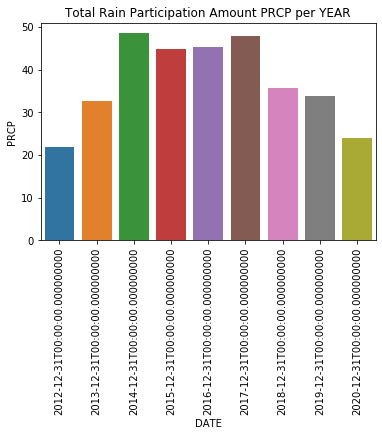

In [76]:
ax = yearly.PRCP.value_counts().plot(kind='bar',lw=2, title='Total Rain Participation Amount PRCP per YEAR')
ax.set_xlabel("Year")
ax.set_ylabel("Total Rain Participation Amount PRCP")

ax= sns.barplot(x=yearly.index, y=yearly.PRCP , data=yearly)

fig = ax.get_figure()
fig.savefig('plot.png')

# 3. Linear Regression Model

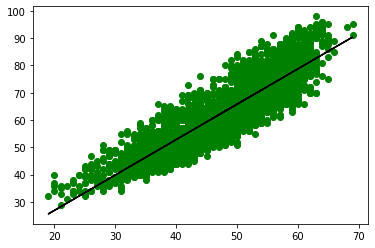

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# LinearRegression will expect an array of shape (n, 1) 
# for the "Training data"
# target data is array of shape (n,) 
X = wx['TMIN'].values[:,np.newaxis]
y = wx['TMAX'].values


model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

plt.show()

In [78]:
print(model.intercept_)
print(model.coef_)

0.9841543335913485
[1.29574354]


What does slope co-efficient tell us? 
It tells us that for every one unit of change in TMIN, the change in TMAX is about 1.29%. Or in simpler words, if TMIN changes one unit, there is an expectation of change of 1.29% in TMAX. 

# 4. Model Selection (Adjusted R-Squared)

In [79]:
# Adjusted R-square for model 1


from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = wx[['TMIN']], wx.TMAX
model.fit(X, y)

# compute with formulas from the theory
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print (r_squared, adjusted_r_squared)
# 0.877643371323 0.863248473832

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print (model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
# 0.877643371323 0.863248473832 


0.7813864445157556 0.7813107473012527
0.7813864445157557 0.7813107473012528


In [82]:
# Adjusted R-square for model 1

from sklearn.linear_model import LinearRegression

wx.dropna(subset = ["TMIN"], inplace=True)
wx.dropna(subset = ["TMAX"], inplace=True)
wx.dropna(subset = ["AWND"], inplace=True)

model = LinearRegression()
X, y = wx[['TMIN','AWND']], wx.TMAX
model.fit(X, y)

# compute with formulas from the theory
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print (r_squared, adjusted_r_squared)
# 0.877643371323 0.863248473832

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print (model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
# 0.877643371323 0.863248473832 


0.791545521749489 0.7914010626516024
0.7915455217494894 0.7914010626516028


Comments: As we can observe that the second model with two covariates TMIN and AWND has higher Adjusted R-squared. Hence, we can make a comment that this is a better model than other one. 

# 5. Graphical Summary

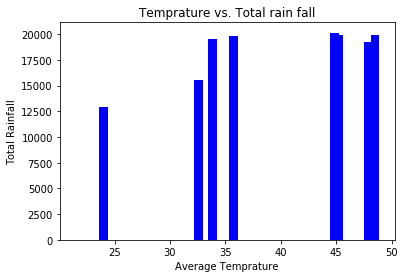

In [81]:
import matplotlib as mp

import numpy as np

mp.use('TkAgg')
import matplotlib.pyplot as plt

plt.title("Temprature vs. Total rain fall")
plt.xlabel('Average Temprature')
plt.ylabel('Total Rainfall')
plt.bar(yearly.PRCP, yearly.TAVG, color="blue")
plt.show()